In a hightly competitive market, customer retention is a critical priority across all industries. Customer churn- the phenomenon where customers discontinue their realtionship with a company- can be driven by various factors like service dissatisfaction, competitive offerings or changes in cutomers needs. Thus, accurately identifying customers at the risk of churning enables organizations to implement targeted rentention startegies. 

The dataset analyzed in this project addresses the challenge of customer churn prediction. The primary objective is to understand the characteristics and behaviors of customers likely to churn, and to develop actionable strategies to minimize attrition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
plt.style.use('fivethirtyeight')

In [2]:
churn=pd.read_csv("CustomerChurn.csv")
churn.shape

(7043, 21)

In [3]:
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [6]:
churn[churn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The customer churn dataset consists of **7043 observations** (rows) and **21 features** (columns). Preliminary data exploration reveals that 3 columns are labeled as numerical features and 18 are categorized as categorical variables. No missing or duplicate values were detected during the initial quality assessment. 

Upon closer inspection, it came to my attention that column `TotalCharges` contains of numerical values but it classified as categorical feature likely because of formatting issues or any inconsistencies. 

In [8]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


`SeniorCitizen` feature, although represented as a numerical column with values 0 and 1, looks more like a categorical column. This is supported by the fact that its 25th,50th, and 75th percentiles are 0, and it only takes on minimum value of 0 and the maximum value of 1.

`Tenure`: The mean is 32 months and the median is 29 months, suggesting a slight right skew in its distribution.

`MonthlyCharges`: The mean is 64 dollars and the median is 70 dollars, indicating potential skewness in the distribution, likely towards lower values.

#### Working with Total Charges Features:

In [9]:
churn_copy=churn.copy()

In [10]:
churn_copy['TotalCharges']=churn_copy['TotalCharges'].replace(' ',np.nan)

In [11]:
churn_copy['TotalCharges']=churn_copy['TotalCharges'].astype(float)

In [12]:
churn_copy.isnull().mean()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [13]:
churn_copy.dropna(subset=['TotalCharges'],inplace=True)

After replacing the blank values (' ') by np.nan, approximately 0.15% missing values was introduced into the dataset. Since, the missing value is less that 5% and assuming that the values were missing completely  at random (MCAR), these records were removed from the dataset to maintain data quality.

#### Inspecting the target variable:

In [14]:
round(churn_copy['Churn'].value_counts(normalize=True)*100,2)

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

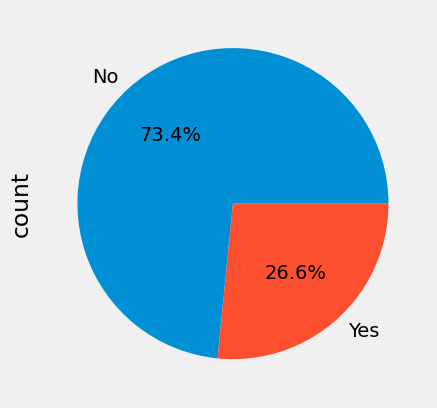

In [15]:
churn_copy['Churn'].value_counts().plot(kind='pie',autopct="%1.1f%%")

plt.show()

The target variable for this analysis is Churn. Examination of the class distribution reveals that the dataset is imbalanced dataset with approximately 73.4% customers classified as non-churners and 26.6% as churners. The primary objective of this project is to derive actionable insights into the characteristics of customers who are likely to churn and to identify strategies for reducing customer attrition.

In [16]:
churn_copy.drop(columns=['customerID'],inplace=True)

#### Univaraite Analysis:

In [17]:
numerical_features=[cols for cols in churn_copy.columns if churn_copy[cols].dtype in ['int64','float64'] and cols!='SeniorCitizen']
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
categorical_features=[cols for cols in churn_copy.columns if churn_copy[cols].dtype in ['object'] and cols!='Churn']
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [19]:
def values(col):
    print(f"{col}:{churn_copy[col].unique()}")

In [20]:
for col in categorical_features:
    values(col)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
def univaraite_numerical_plot(df,numerical_feature):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    sns.kdeplot(data=df,x=numerical_feature,ax=ax[0],color='purple',fill=True)
    sns.boxplot(data=df,y=numerical_feature,ax=ax[1],color='lightcoral')

     #Summary statistics:
    mean=df[numerical_feature].mean()
    median=df[numerical_feature].median()
    std=df[numerical_feature].std()
    skew=df[numerical_feature].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"Skewness:{round(skew,2)}\n"
     )

    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )
    
    plt.tight_layout()
    plt.show()

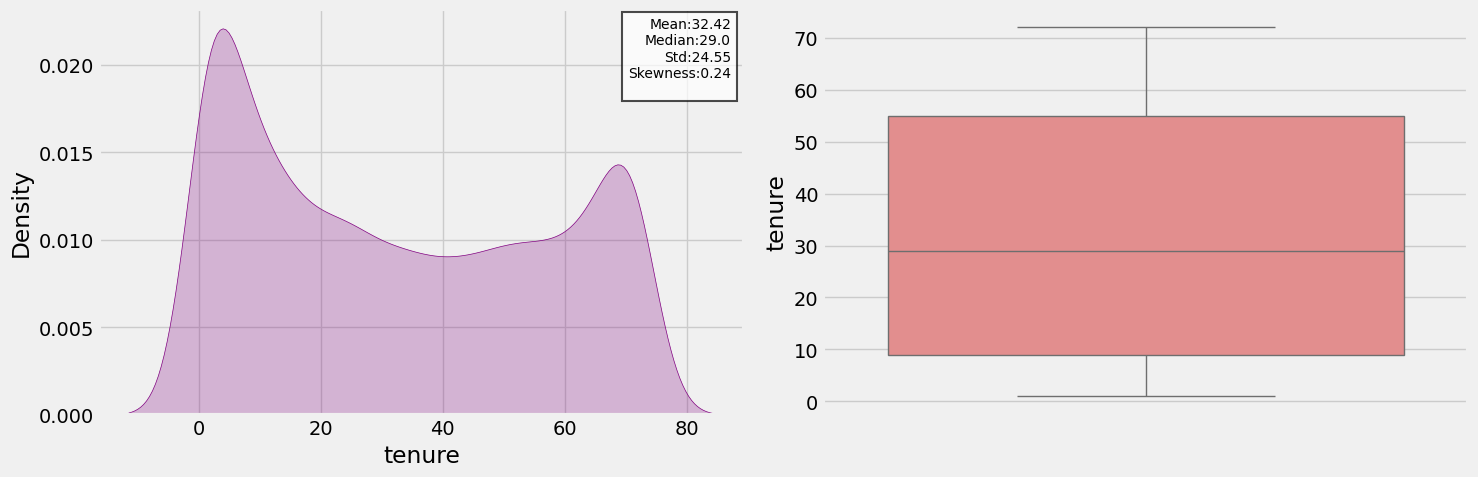

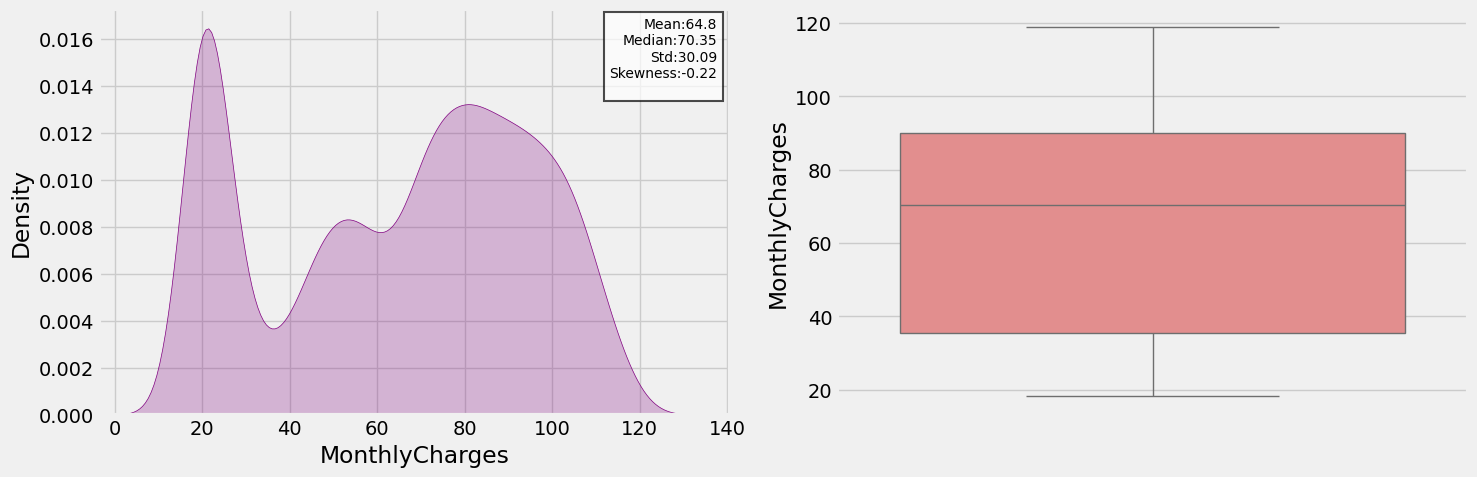

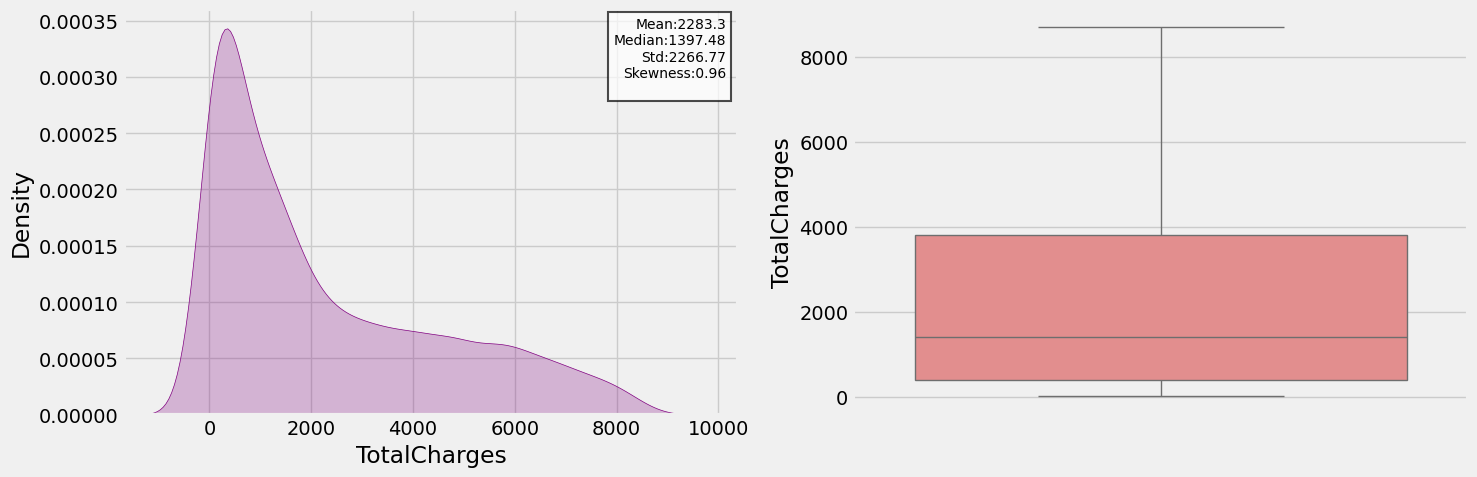

In [22]:
for col in numerical_features:
    univaraite_numerical_plot(churn_copy,col)

1. **Tenure:**
   - Distribution: The distribution is bimodal (two peaks). The first peak is around 0-10 months (new customers) and the second peak is around 65-75 months (long-term customers). There are two main groups: New Customers(many customers have recently joined) and Loyal Customers(another group who have stayed for a very long time)
   - Outliers: According to the boxplot, there seem to be no outliers which indicate that most cutomers fall within a typical range.
2. **Monthly Chanrges:**
   - Distribution: The distributon is also bimodal. There are two peaks around 20-30 and 80-90. This indicates that majority of the customers either pay as low as 20-30 dollars whereas some also pay 80-90 dollars (might be for some premium services).
   - Outliers: According to th boxplot, there seem to be no outliers.
  
3. **TotalCharges:**
    - Distribution: The distribution is right skewed, with most of the customers paying less money but a long tail indicating that some customers pay relatively higher.
   - Outliers: According to the boxplot, there seem to be no outliers.

In [23]:
def univaraite_categorical_plot(df,categorical_feature):

    counts=df.groupby([categorical_feature,'Churn']).size().reset_index(name='Count')
    total_counts=df.groupby([categorical_feature]).size().reset_index(name='Total')
    merged=pd.merge(counts,total_counts,on=categorical_feature)
    merged['Percentage'] = (merged['Count'] / merged['Total']) * 100
    
    fig,ax=plt.subplots(figsize=(15,5))
    ax=sns.barplot(data=merged,x=categorical_feature,y='Percentage',hue='Churn',ax=ax)
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)


    plt.tight_layout()
    plt.show()

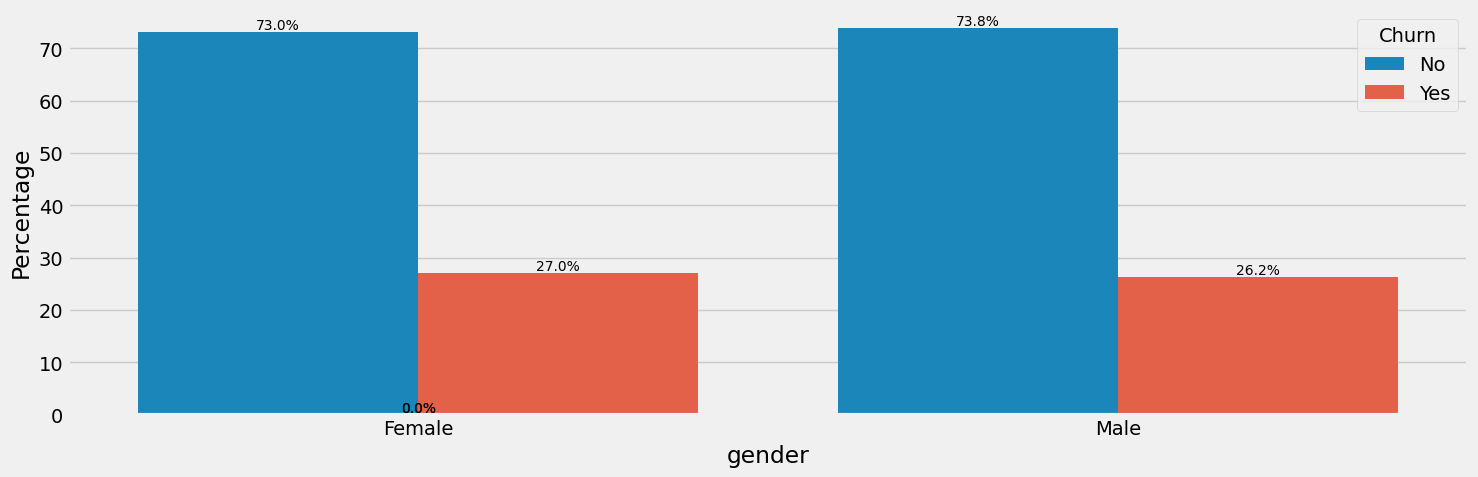

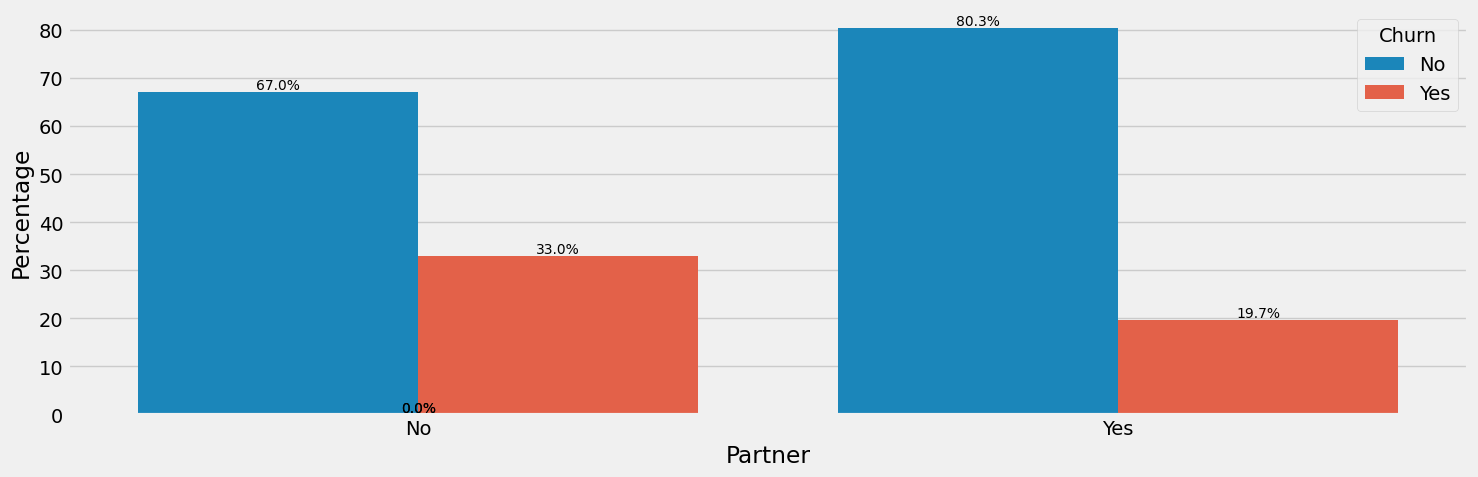

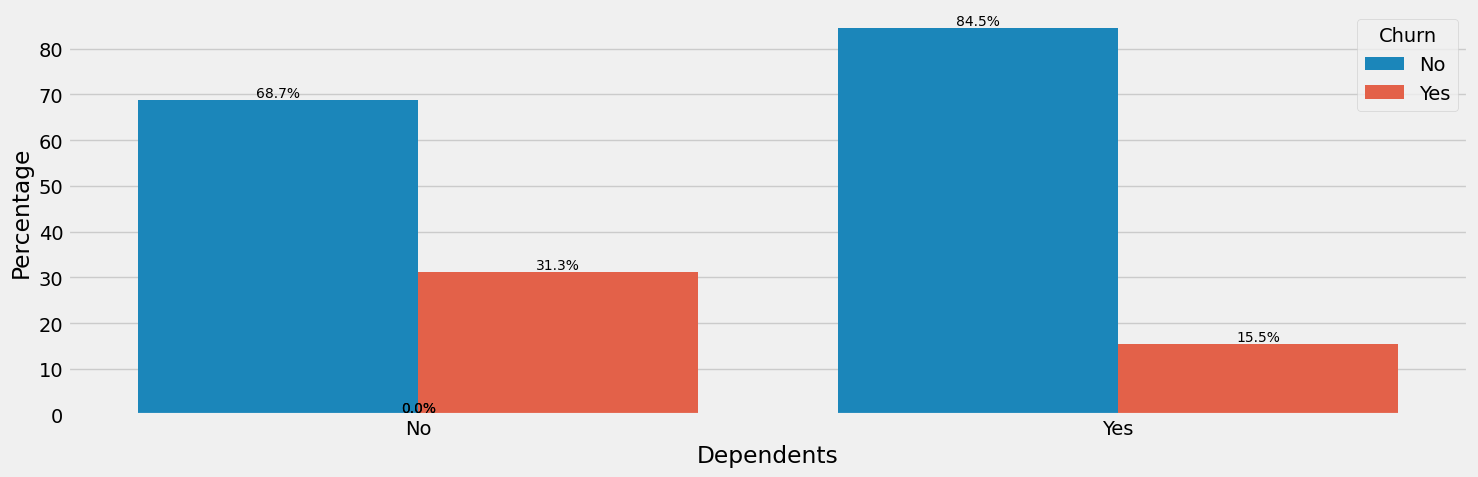

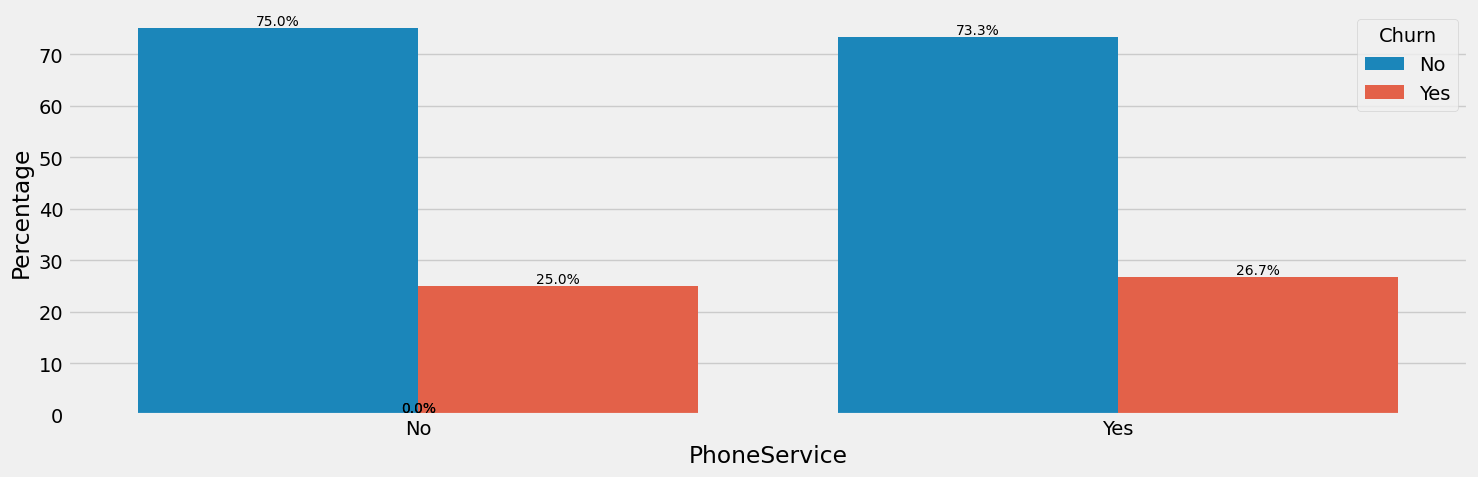

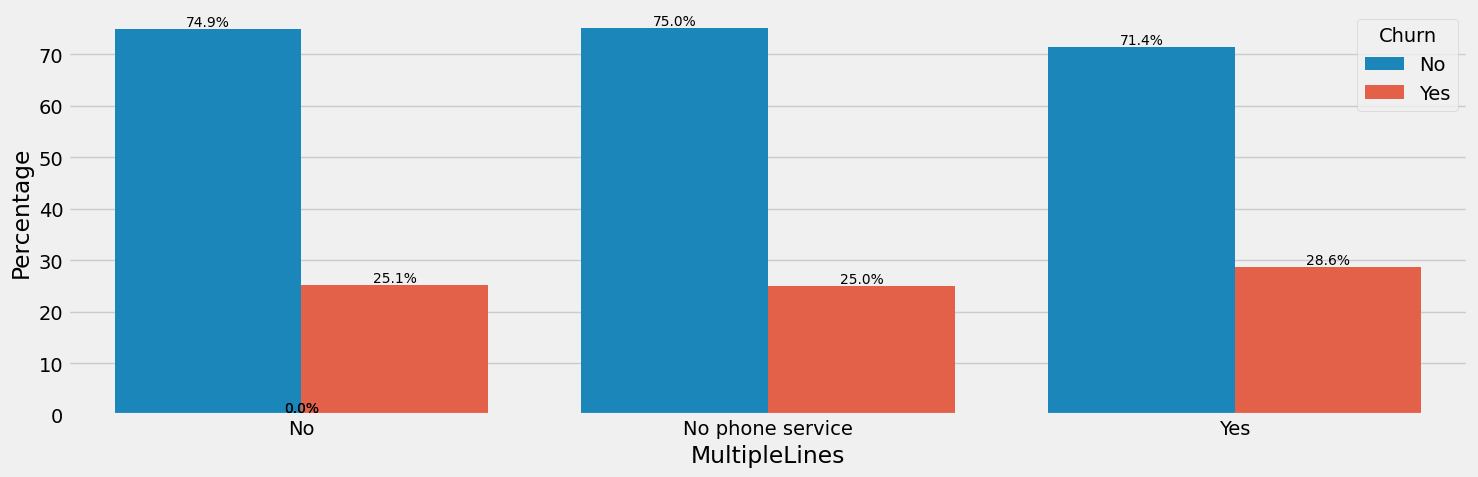

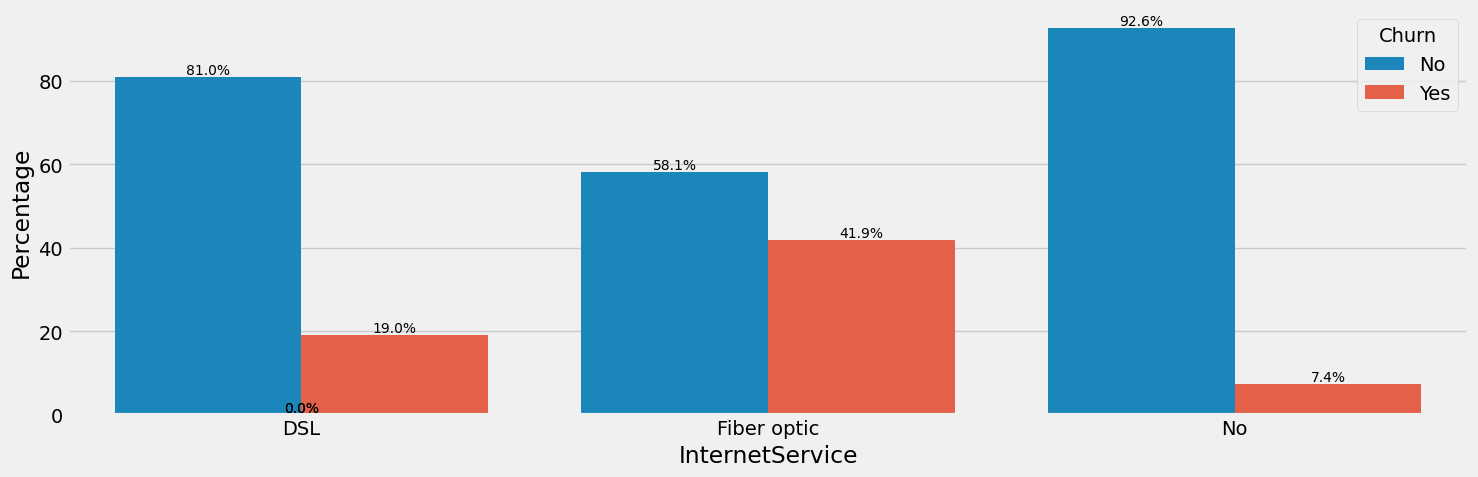

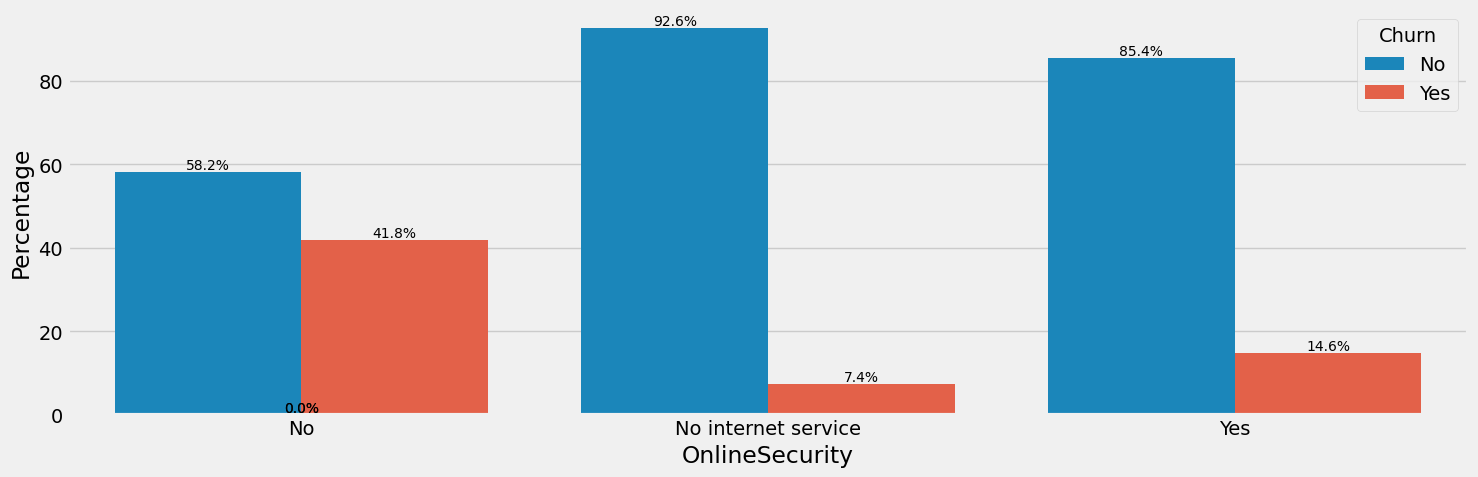

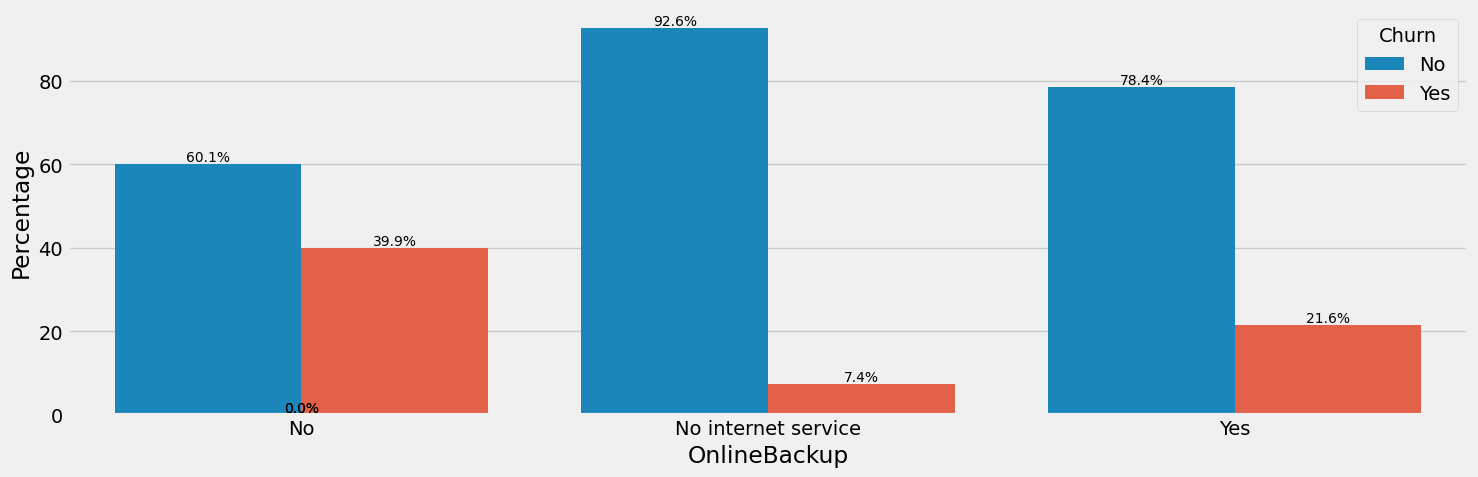

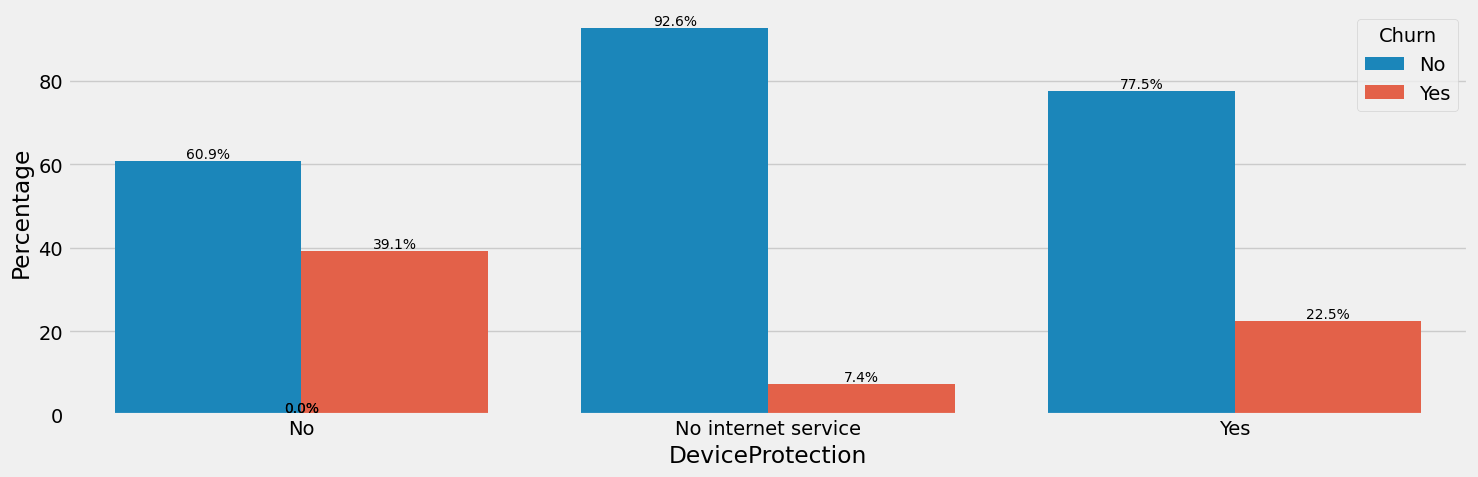

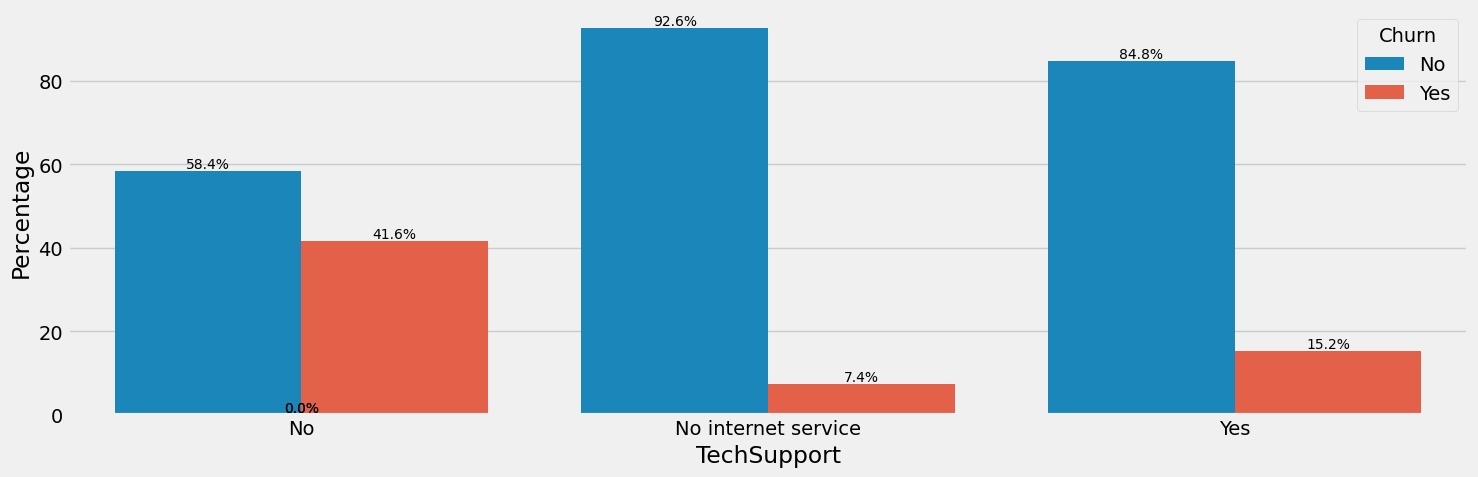

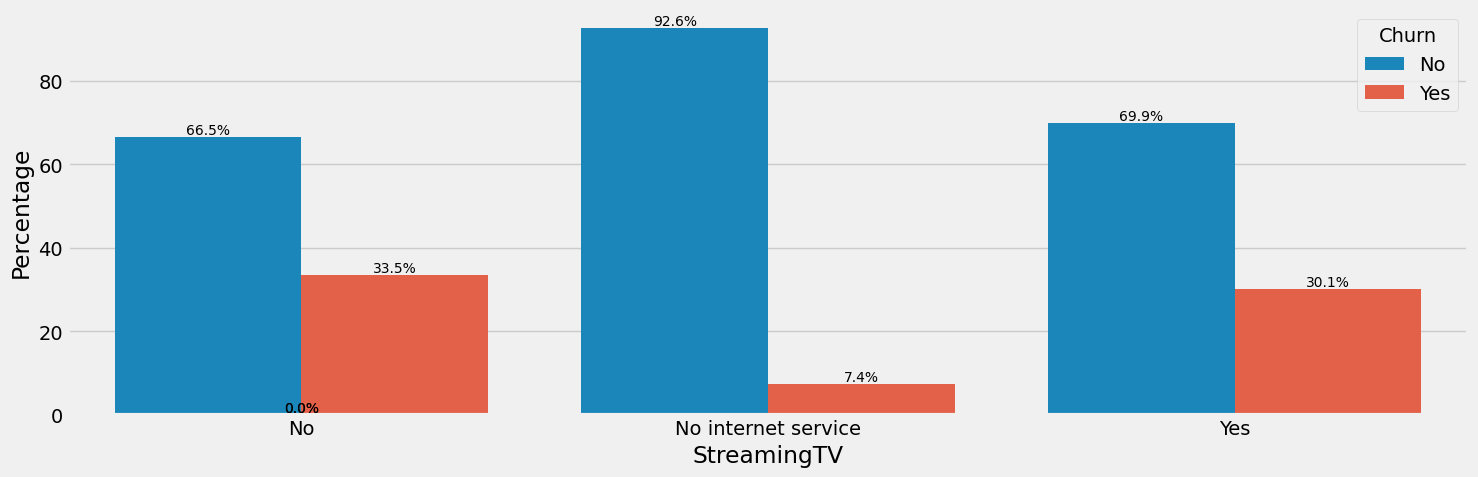

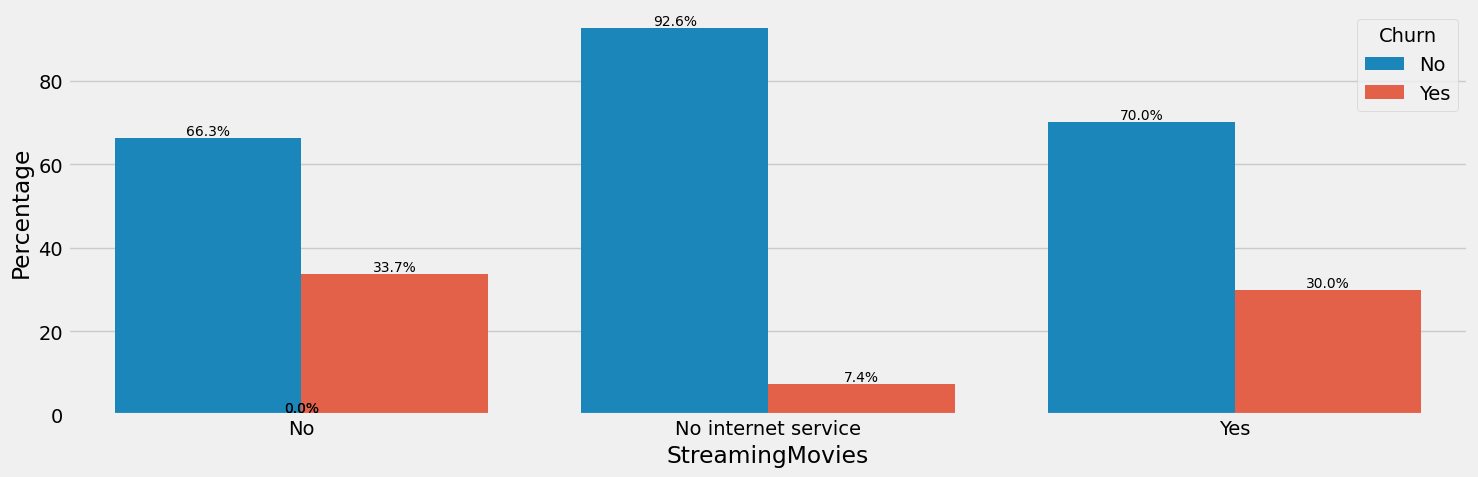

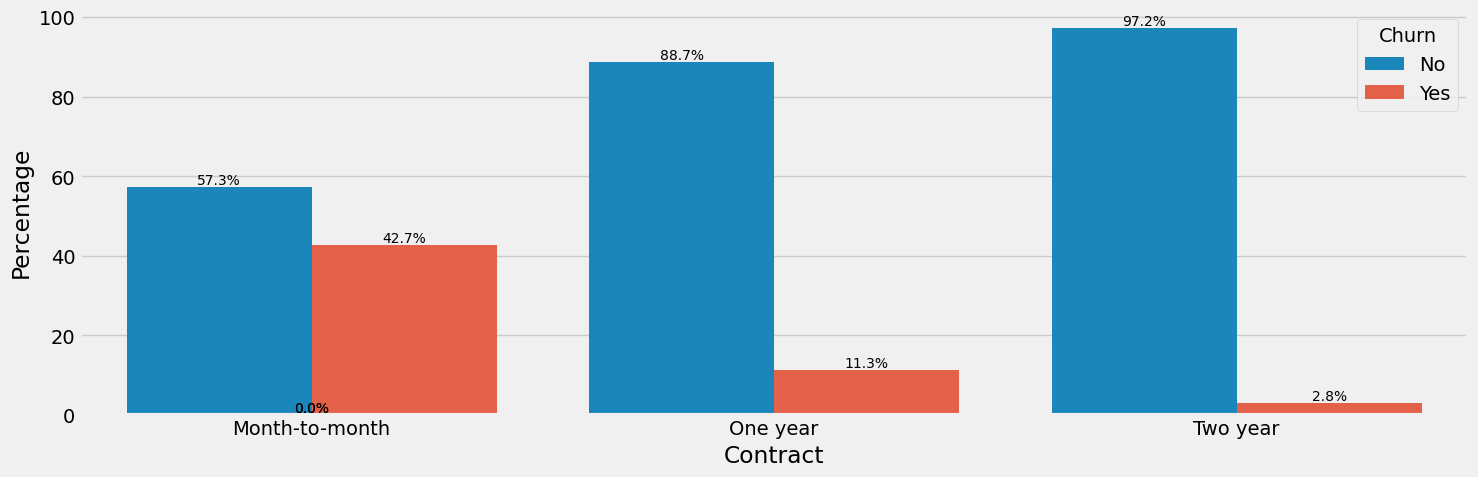

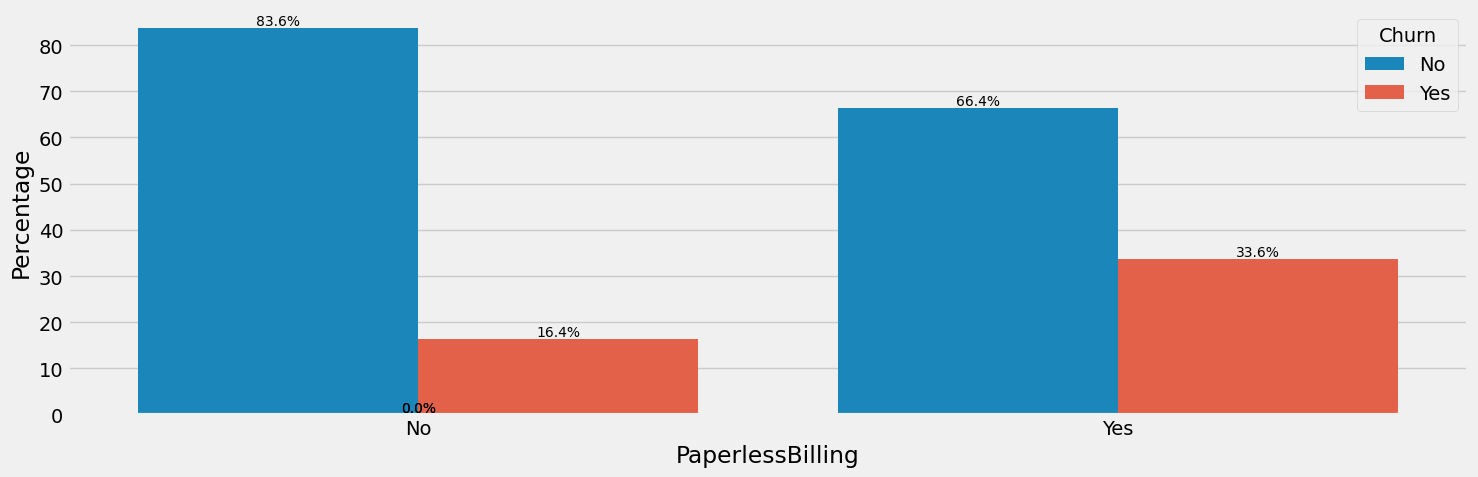

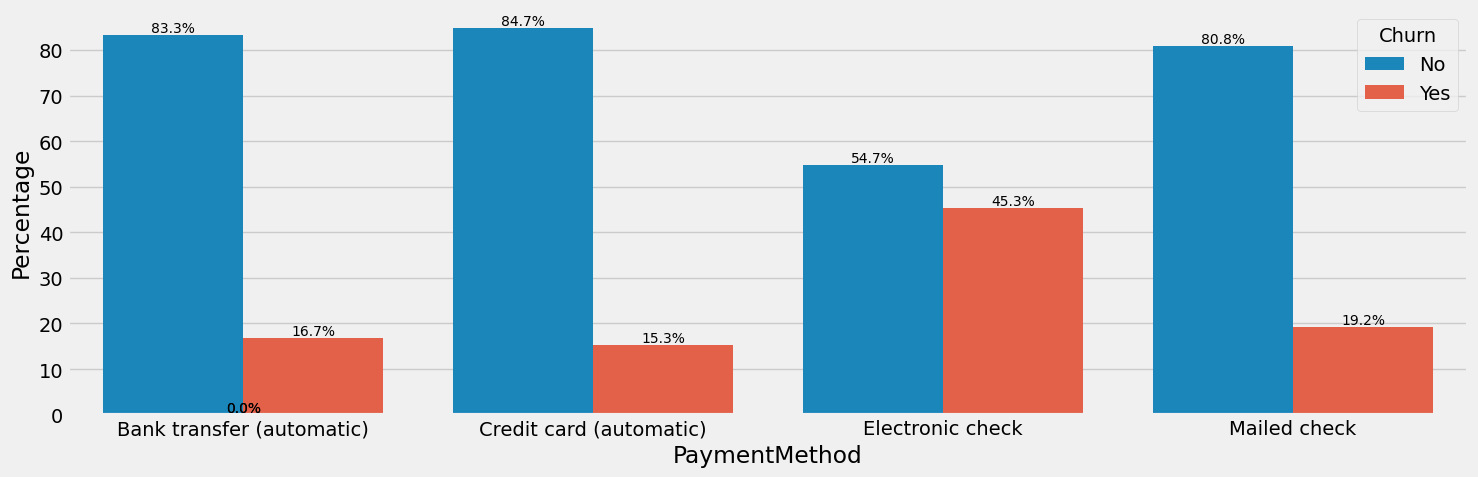

In [24]:
for col in categorical_features:
    univaraite_categorical_plot(churn_copy,col)

**Gender:** There is no major difference in churn behavior between males and females. Both genders have almost the same churn rate (~27%). Thus, Gender alone is not a strong predictor of churn in our dataset. However, interaction with other features may reveal nuanced relationships.

**Partner:** Customers without partners are much more likely to churn (33%) compared to those with a partner(19.7%). Customers with partners may feel more financially stable and less likely to switch between services. Thus, partner status might be an important feature in our churn prediction model.

**Online Security, Online Backup, Device Security, Streaming Movies, Tech Support:** The absence of all these facilities would mean that the customers are more likely churn, because in the modern generation these are some fundamental services offered by telecom, thus the absence of these services means that customers are more likely to churn.

**Contract:** Customers on monthly basis contracts are more likely to churn due to ease of cancellation. Overtime they might recieve better offers, or might just decide to leave as an outcome of not being satisfied with the telecom facilities. Thus, it's obvious that customers locked in for a longer tenure are more likely to stay with the company.


In [25]:
churn_customers=churn_copy[churn_copy['Churn']=='Yes'][numerical_features]
loyal_customers=churn_copy[churn_copy['Churn']=='No'][numerical_features]

In [26]:
df1=churn_customers.describe()
df2=loyal_customers.describe()

merged=pd.concat([df1,df2],axis=1,keys=['Churn Customers','Not Churn Customers'])
merged

Churn Customers                             Not Churn Customers  \
               tenure MonthlyCharges TotalCharges              tenure   
count     1869.000000    1869.000000  1869.000000          5163.00000   
mean        17.979133      74.441332  1531.796094            37.65001   
std         19.531123      24.666053  1890.822994            24.07694   
min          1.000000      18.850000    18.850000             1.00000   
25%          2.000000      56.150000   134.500000            15.00000   
50%         10.000000      79.650000   703.550000            38.00000   
75%         29.000000      94.200000  2331.300000            61.00000   
max         72.000000     118.350000  8684.800000            72.00000   

                                   
      MonthlyCharges TotalCharges  
count    5163.000000  5163.000000  
mean       61.307408  2555.344141  
std        31.094557  2329.456984  
min        18.250000    18.800000  
25%        25.100000   577.825000  
50%        64.450000  1683.600000  
75%        88.475000  4264.125000  
max       118.750000  8672.450000

**Tenure:** 
- Churn Customers: The mean tenure is approximately 18 months, much lower than the non churn customers. The median tenure is just 10 months indicating that customers generally leave relatively early.
- Non Churn Customers: The mean tenure is approximately 38 months, almost double than the customers who churn.
Insights: Customers who tend to Churn have a less tenure with the company giving them the flexibilty to change services promptly. Retention efforts should focus on emphasizing customers to take long-term plans.

**Monthly Charges & Total Charges:**
- Churn Customers: The mean monthly charge is $74.4 which is much higher than for customers who are likely to stay.

Insights: Customers having more charges are likely to leave the service. 

In [27]:
def bivaraite_analysis(cols):
    fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,5),sharex=True)
    
    sns.histplot(data=churn_customers,x=cols,color='green',ax=ax[0],kde=True)
    ax[0].set_title(f"Histogram of {col} for Churn Customers")
    sns.histplot(data=loyal_customers,x=cols,color='green',ax=ax[1],kde=True)
    ax[1].set_title(f"Histogram of {col} for Loyal Customers")
    
     
    plt.tight_layout()
    plt.show()

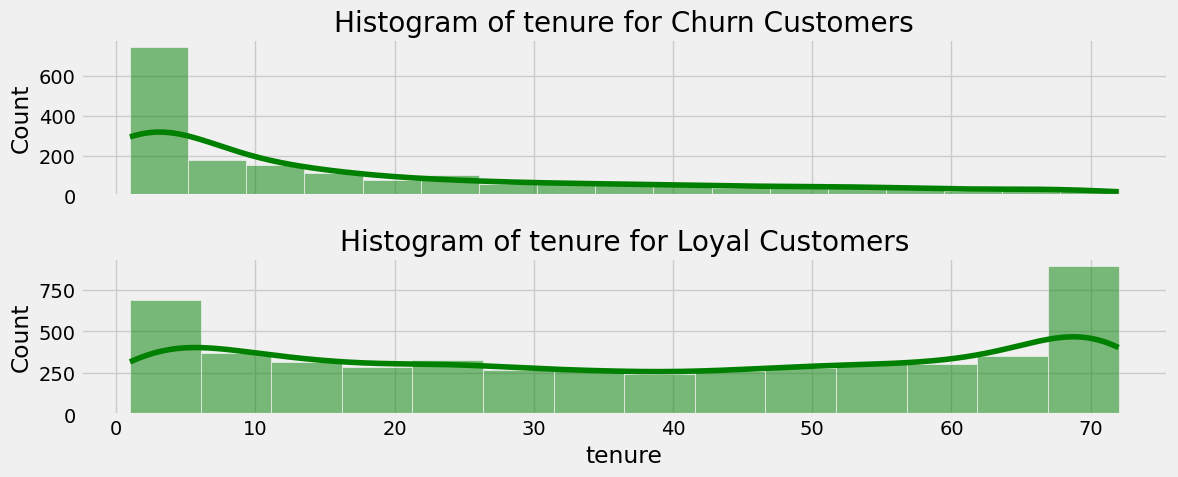

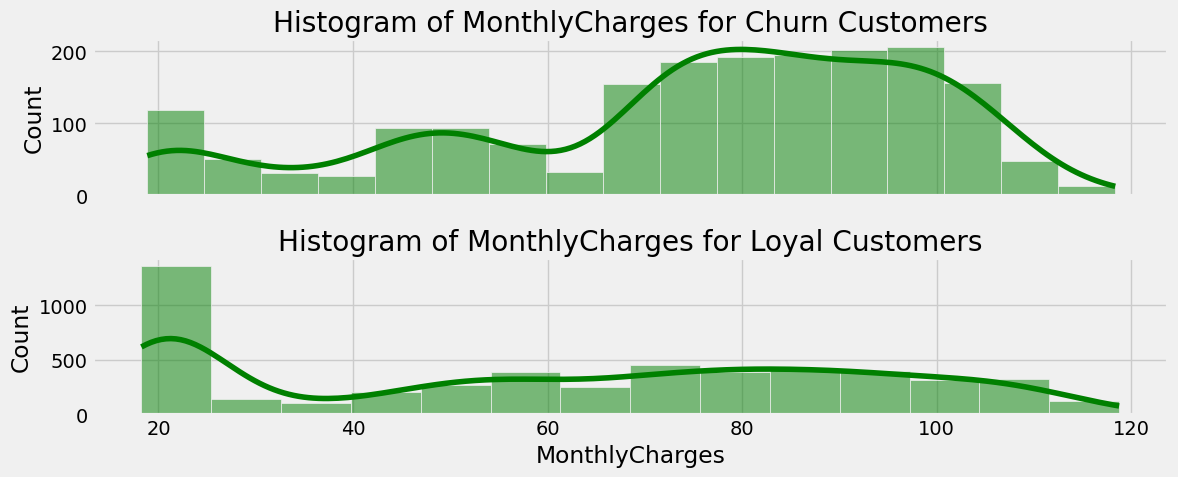

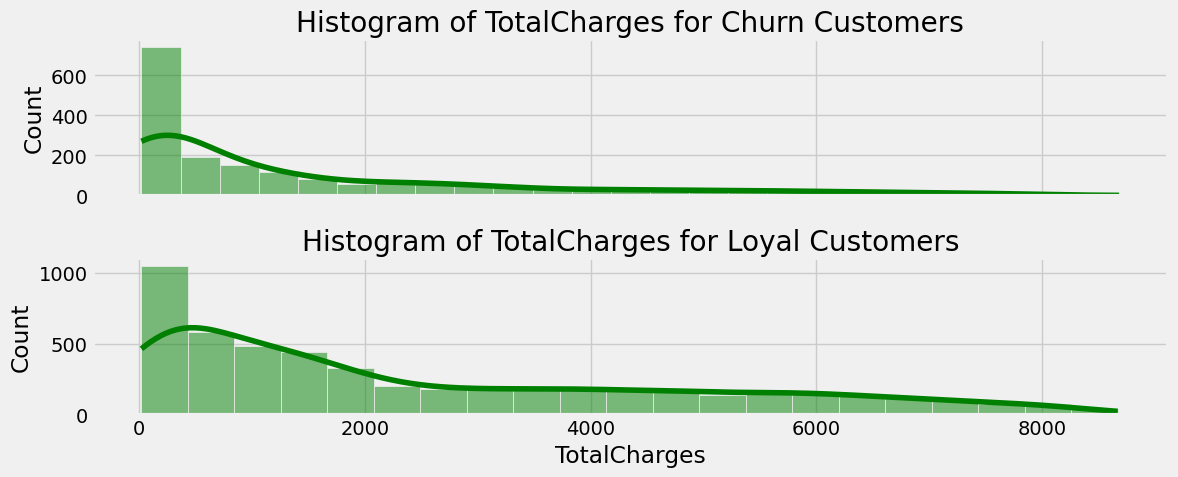

In [28]:
for col in numerical_features:
    bivaraite_analysis(col)

**Tenure:** Usually customers who have short term are likely to churn.

**Monthly Charges:** Most of the customers having higher monthly charges leading to higher toatal charges churn the company.

#### Encoding

In [29]:
X=churn_copy.drop(columns="Churn")
Y=churn_copy['Churn']

In [30]:
le=LabelEncoder()
y_encoded=le.fit_transform(Y)

In [31]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
onehotencoder=[col for col in churn_copy.columns if churn_copy[col].dtype == 'object' and col not in ['Contract','Churn']]
onehotencoder

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
ordinalencoder=['Contract']
ordinalencoder

['Contract']

In [34]:
churn_copy['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [35]:
transformer=ColumnTransformer(transformers=[
("trf1",OneHotEncoder(drop='first',sparse_output=False),onehotencoder),
("trf2",OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]),ordinalencoder)], remainder="passthrough")

In [36]:
X_transformed_array=transformer.fit_transform(X)
X_transformed_array.shape

(7032, 29)

In [37]:
ohe_feature_names = transformer.named_transformers_['trf1'].get_feature_names_out(onehotencoder)
passthrough_features = X.drop(columns=onehotencoder + ordinalencoder).columns.tolist()
final_feature_names = list(ohe_feature_names) + ordinalencoder + passthrough_features
X_transformed = pd.DataFrame(X_transformed_array, columns=final_feature_names)
X_transformed[passthrough_features] = X_transformed[passthrough_features].apply(pd.to_numeric)

In [38]:
churn_eda_ready = X_transformed.copy()
churn_eda_ready['Churn'] = y_encoded
churn_eda_ready

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29.85,29.85,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,34.0,56.95,1889.50,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,45.0,42.30,1840.75,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,24.0,84.80,1990.50,0
7028,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,72.0,103.20,7362.90,0
7029,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,11.0,29.60,346.45,0
7030,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,4.0,74.40,306.60,1


In [39]:
churn_corr=churn_eda_ready.corr()

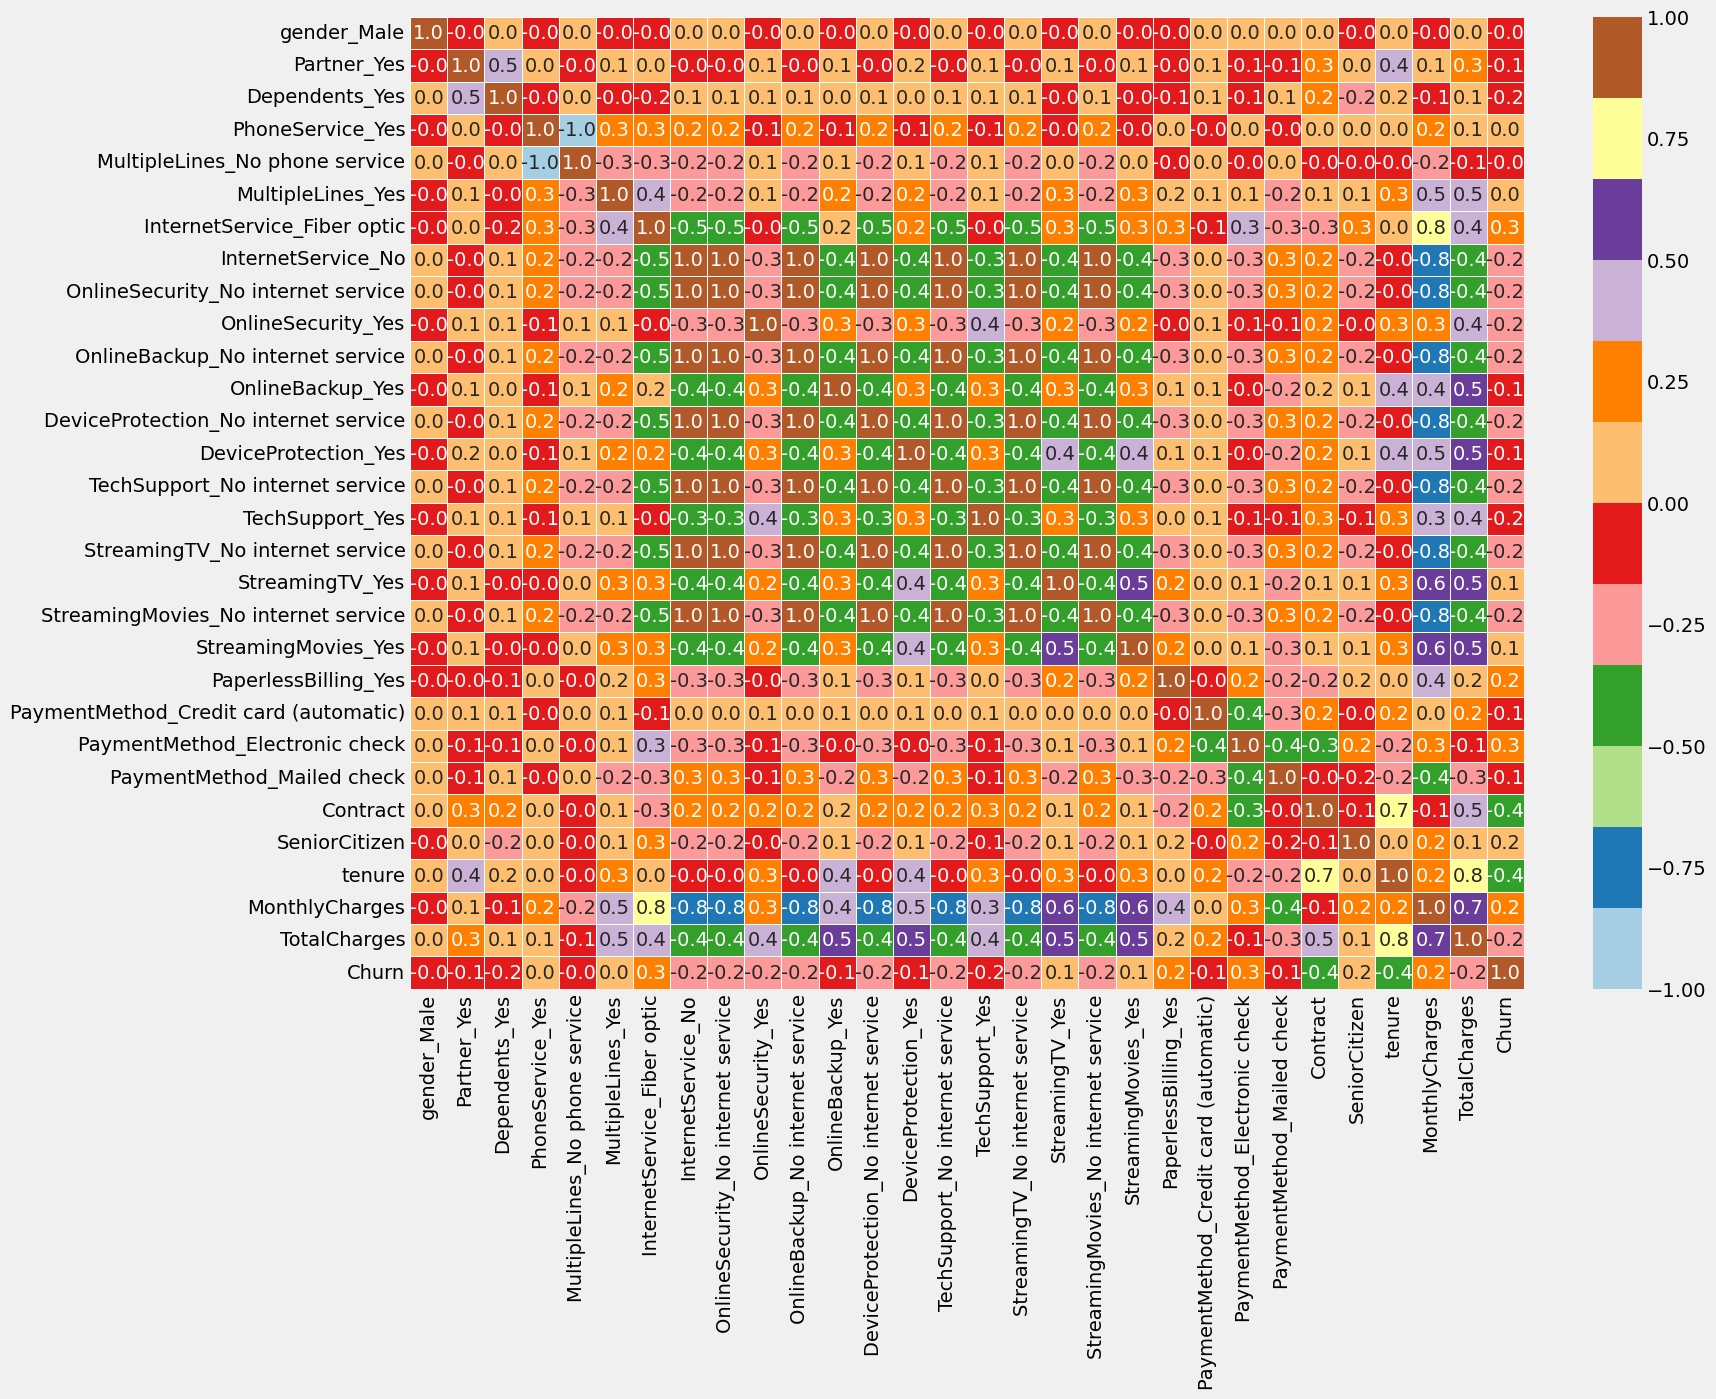

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(churn_corr,annot=True,linewidth=0.5,fmt='.1f',cmap="Paired")

plt.show()

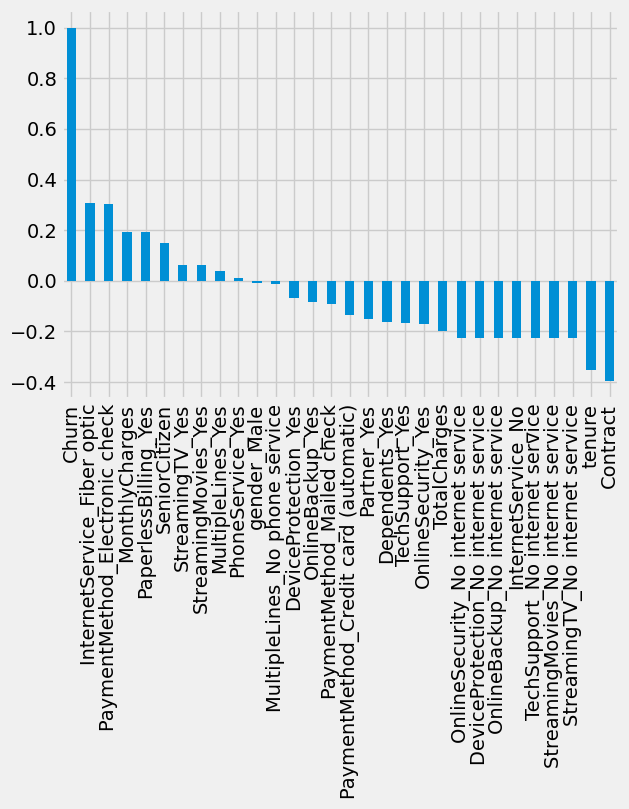

In [41]:
churn_corr['Churn'].sort_values(ascending=False).plot(kind='bar')

plt.show()